In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [39]:
df = pd.read_csv('EEG_Eye_State.csv')

In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [41]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train.shape

(11235, 14)

In [44]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [45]:
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
    # Reshape([1])
])

In [46]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png',show_shapes=True, show_layer_names=True)

In [47]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
history = model.fit(X_train, 
                    y_train, 
                    epochs=5, 
                    batch_size=128, 
                    validation_split=0.2, 
                    verbose= 2, 
                    callbacks=[es])

Epoch 1/5
71/71 - 12s - loss: 0.6591 - accuracy: 0.5849 - val_loss: 0.6306 - val_accuracy: 0.6017 - 12s/epoch - 170ms/step
Epoch 2/5
71/71 - 1s - loss: 0.6246 - accuracy: 0.6262 - val_loss: 0.5968 - val_accuracy: 0.6520 - 845ms/epoch - 12ms/step
Epoch 3/5
71/71 - 1s - loss: 0.5951 - accuracy: 0.6570 - val_loss: 0.5702 - val_accuracy: 0.6809 - 811ms/epoch - 11ms/step
Epoch 4/5
71/71 - 1s - loss: 0.5673 - accuracy: 0.6864 - val_loss: 0.5244 - val_accuracy: 0.7156 - 894ms/epoch - 13ms/step
Epoch 5/5
71/71 - 1s - loss: 0.5421 - accuracy: 0.7035 - val_loss: 0.4985 - val_accuracy: 0.7343 - 851ms/epoch - 12ms/step


In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0) #=2, verbose=1 (auto) by default
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

Test loss: 0.5174130201339722, Test accuracy: 0.7244325876235962


In [ ]:
from sklearn.metrics import classification_report
from Classification_Reports import classification_reports

classification_report(y_test, model.predict(X_test))

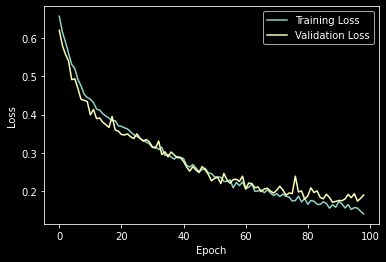

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Kapaa:", cohen_kappa_score(y_test, y_pred))
print("\nConfusion_matrix: \n", confusion_matrix(y_test, y_pred))

94/94 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1410
           1       0.92      0.95      0.93      1586

    accuracy                           0.93      2996
   macro avg       0.93      0.92      0.93      2996
weighted avg       0.93      0.93      0.93      2996

Kapaa: 0.8509842791362935

Confusion_matrix: 
 [[1273  137]
 [  85 1501]]
